# Задание 1

Построить модель предсказания стоимости дома (median_house_value) по остальным его атрибутам

In [1]:
import pandas
datas= pandas.read_csv('housing.csv')


In [2]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(datas, test_size=0.2)
train_v, val= train_test_split(train, test_size=0.25)

<AxesSubplot:>

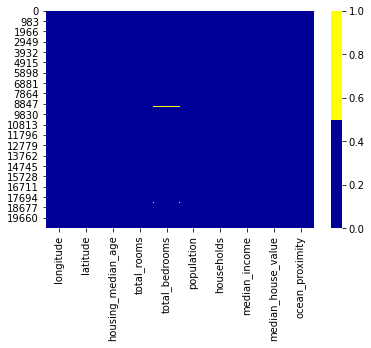

In [3]:
import seaborn as sns
cols = datas.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(datas[cols].isnull(), cmap=sns.color_palette(colours))


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

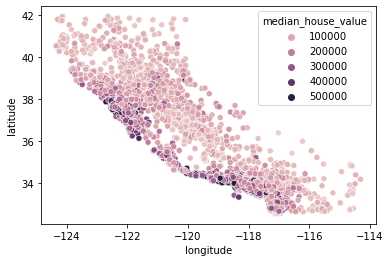

In [4]:
sns.scatterplot(data=train, x='longitude', y='latitude', hue='median_house_value')

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

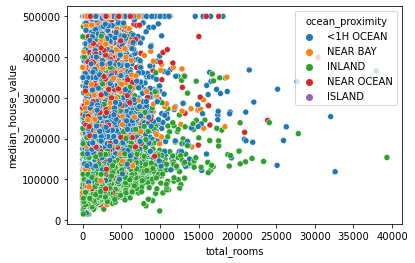

In [5]:
sns.scatterplot(data=train, x='total_rooms', y='median_house_value', hue='ocean_proximity')

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

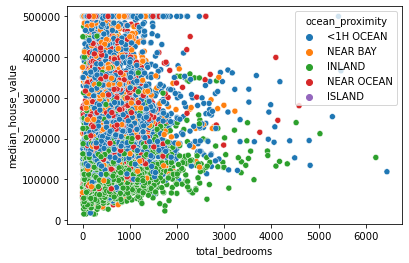

In [6]:
sns.scatterplot(data=train, x='total_bedrooms', y='median_house_value', hue='ocean_proximity')

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

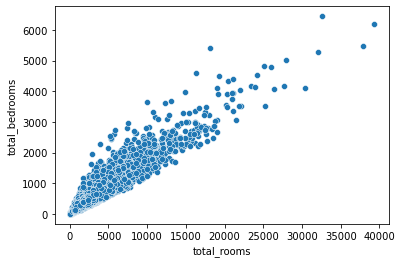

In [7]:
sns.scatterplot(data=train, x='total_rooms', y='total_bedrooms')

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

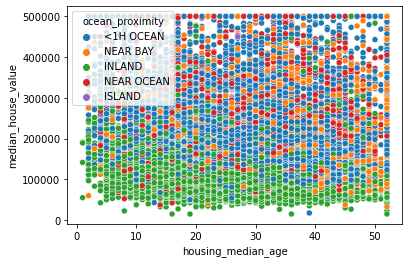

In [8]:
sns.scatterplot(data=train, x='housing_median_age', y='median_house_value', hue='ocean_proximity')

In [9]:
train.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
import numpy as np


In [11]:

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
def prepare_data(datas,were_hot=None):
    datas= datas.copy()
    
    
    imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    imputer=imputer.fit(datas[['total_bedrooms']]) 
    datas['total_bedrooms'] =imputer.transform(datas[['total_bedrooms']])
    
 

    
    
    categories_for_one_hot = ['ocean_proximity']
    
    if not were_hot:
        one_hot = OneHotEncoder(sparse=False)
        one_hot.fit(datas.loc[:,categories_for_one_hot])
    else:
        one_hot = were_hot['one_hot']
        
    one_hot_result = one_hot.transform(datas.loc[:,categories_for_one_hot])
    
    
    offset = 0
    for category_values, category_name in zip(one_hot.categories_, categories_for_one_hot):
        for  value in category_values:
            column_name = f'{category_name}={value}'
            datas[column_name] = one_hot_result[:,offset]
            offset += 1
    
    datas= datas.drop(['ocean_proximity'],axis='columns')
    
    datas['mean_rooms']=datas['total_rooms']/datas['households']
    datas['mean_bedrooms']=datas['total_bedrooms']/datas['households']
    datas=datas.drop(['total_rooms', 'total_bedrooms'], axis = 'columns')
    
    
    
    x = datas['longitude']
    y = datas['latitude']
    X = np.column_stack((x,y))

    Xcentered = X - X.mean(axis=0)
    covmat = Xcentered.T.dot(Xcentered)
    _, vecs = np.linalg.eigh(covmat)
    v = -vecs[:,1]
    Xnew = Xcentered.dot(vecs)
    
    y=[]
    x=[]
    for i in Xnew:
        x.append(i[0])
        y.append(i[1])
    datas['longitude']=x
    datas['latitude']=y
    #scaler = MinMaxScaler()
    #datas['longitude']=scaler.fit_transform(datas[['longitude']])
    #datas['latitude']=scaler.fit_transform(datas[['latitude']])
    
    if not were_hot:
        return [datas.drop(['median_house_value'], axis = 'columns'), datas['median_house_value'], {"one_hot": one_hot}]
    else:
         return [datas.drop(['median_house_value'], axis = 'columns'), datas['median_house_value']]

In [13]:
X_train, y_train, hot_ = prepare_data(train)

In [14]:
X_train.sample(500)

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity=<1H OCEAN,ocean_proximity=INLAND,ocean_proximity=ISLAND,ocean_proximity=NEAR BAY,ocean_proximity=NEAR OCEAN,mean_rooms,mean_bedrooms
19846,-0.862204,0.253510,23.0,1056.0,338.0,3.2159,0.0,1.0,0.0,0.0,0.0,5.576923,1.073964
2838,-0.246436,-0.553292,51.0,648.0,300.0,2.8295,0.0,1.0,0.0,0.0,0.0,4.576667,0.946667
18118,0.652451,2.910637,33.0,1230.0,418.0,6.3197,1.0,0.0,0.0,0.0,0.0,6.131579,1.038278
5498,0.270192,-1.972198,18.0,884.0,456.0,2.9338,1.0,0.0,0.0,0.0,0.0,2.866228,0.967105
5355,0.242909,-1.942947,49.0,228.0,106.0,8.0239,1.0,0.0,0.0,0.0,0.0,5.669811,0.896226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146,0.029074,-1.581735,25.0,689.0,216.0,6.0097,1.0,0.0,0.0,0.0,0.0,5.972222,0.879630
11025,-0.018029,-2.528192,26.0,3657.0,617.0,4.1339,1.0,0.0,0.0,0.0,0.0,4.280389,1.025932
18166,0.625168,2.939888,18.0,507.0,271.0,5.3679,1.0,0.0,0.0,0.0,0.0,4.505535,0.940959
16231,-0.323750,2.916322,47.0,1228.0,619.0,3.0625,0.0,1.0,0.0,0.0,0.0,5.470113,1.071082


In [15]:
y_train[:5]

17602    247000.0
125      337300.0
5252     500001.0
7021     156700.0
18830     54400.0
Name: median_house_value, dtype: float64

In [16]:
X_train[X_train.columns].describe()

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity=<1H OCEAN,ocean_proximity=INLAND,ocean_proximity=ISLAND,ocean_proximity=NEAR BAY,ocean_proximity=NEAR OCEAN,mean_rooms,mean_bedrooms
count,1.651200e+04,1.651200e+04,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,5.823868e-13,2.380486e-13,28.584908,1424.674843,498.389232,3.862284,0.439922,0.321827,0.000242,0.108951,0.129058,5.432069,1.106421
std,5.672103e-01,2.869114e+00,12.615743,1144.010904,382.347371,1.907095,0.496393,0.467191,0.015563,0.311587,0.335274,2.422885,0.528058
min,-3.821933e+00,-5.482547e+00,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.149622
25%,-2.986405e-01,-2.293334e+00,18.000000,786.000000,279.000000,2.556200,0.000000,0.000000,0.000000,0.000000,0.000000,4.436876,1.005556
50%,1.121260e-01,-1.724861e+00,29.000000,1167.000000,409.000000,3.522700,0.000000,0.000000,0.000000,0.000000,0.000000,5.230769,1.048996
75%,3.224432e-01,3.096760e+00,37.000000,1721.000000,603.000000,4.735625,1.000000,1.000000,0.000000,0.000000,0.000000,6.054360,1.100467
max,1.346925e+00,7.749785e+00,52.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,141.909091,33.562183


In [17]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [18]:
X_val, y_val =prepare_data(val, hot_)

In [19]:
X_val

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity=<1H OCEAN,ocean_proximity=INLAND,ocean_proximity=ISLAND,ocean_proximity=NEAR BAY,ocean_proximity=NEAR OCEAN,mean_rooms,mean_bedrooms
6728,-0.038502,-2.142622,52.0,1057.0,364.0,10.2317,1.0,0.0,0.0,0.0,0.0,7.656593,0.969780
6172,-0.150681,-2.301102,34.0,819.0,273.0,3.3977,1.0,0.0,0.0,0.0,0.0,5.161172,1.117216
19760,-1.114381,5.094848,15.0,858.0,327.0,2.4375,0.0,1.0,0.0,0.0,0.0,5.128440,1.058104
12178,-0.465415,-2.947200,22.0,2405.0,846.0,2.1549,0.0,1.0,0.0,0.0,0.0,5.022459,1.089835
10081,-2.059121,3.142423,7.0,245.0,92.0,4.0481,0.0,1.0,0.0,0.0,0.0,22.228261,3.891304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,-0.076077,2.444183,34.0,147.0,47.0,3.0000,0.0,1.0,0.0,0.0,0.0,6.255319,1.042553
2904,-0.242077,-0.613486,45.0,568.0,139.0,1.7321,0.0,1.0,0.0,0.0,0.0,4.525180,1.028777
16719,0.886113,0.581875,19.0,1341.0,441.0,3.2250,1.0,0.0,0.0,0.0,0.0,5.238095,1.068027
5290,0.273677,-1.935151,45.0,415.0,209.0,7.0285,1.0,0.0,0.0,0.0,0.0,6.440191,1.023923


In [20]:
lreg_pred=lreg.predict(X_val)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_val, lreg_pred)

0.6615553046709972

In [22]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'fit_intercept':[True,False]}
grid = GridSearchCV(model,parameters, scoring='r2',cv=None)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [23]:
grid.best_params_

{'fit_intercept': False}

In [24]:
grid.best_score_

0.6383420101127979

In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train.values, y_train)
xgb.score(X_val.values, y_val)

0.8759440101777145

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [5,6,7],
         'n_estimators':[1000,2000],
         'tree_method':[ 'exact']}
xgb = XGBRegressor() 

grid =RandomizedSearchCV(xgb, params, scoring='r2',cv=None)
grid.fit(X_train.values , y_train)
print(r2_score(y_val, grid.best_estimator_.predict(X_val.values)), grid.best_params_) 

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.9141943230551276 {'tree_method': 'exact', 'n_estimators': 1000, 'max_depth': 5}
